# TensorFlow Quick Start

## Immport required Libiraries and Data from TensorFlow

In [1]:
# Install the tensorflow package
%pip install tensorflow

# import tensonflow from `tensorflow` package
import tensorflow as tf

import numpy as np

# import matplotlib.pyplot from `matplotlib` package
import matplotlib.pyplot as plt

# import pandas from `pandas` package
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Load Dataset

Number of training samples (x_train): 60000
Number of testing samples (x_test): 10000
Shape of the training set (x_train.shape): (60000, 28, 28)
Shape of the testing set (x_test.shape): (10000, 28, 28)
Number of training labels (y_train): 60000
Number of testing labels (y_test): 10000
Shape of the training labels (y_train.shape): (60000,)
Shape of the testing labels (y_test.shape): (10000,)


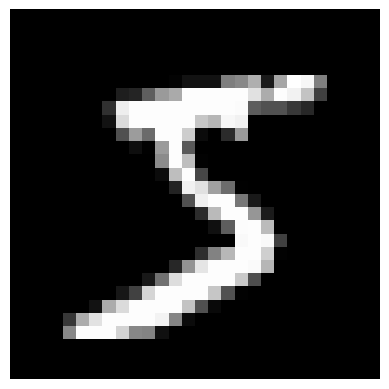

Label: 5
Pixel values of the first training image:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Normalized pixel values of the first training image:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

In [2]:
# Step 1: Load the MNIST Dataset from TensorFlow
# Following line imports the MNIST dataset from TensorFlow's Keras module.
# The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits (0 to 9).
mnist = tf.keras.datasets.mnist


# Step 2: Split the dataset into training and testing sets
# This line loads the MNIST dataset and splits it into training and test sets:
# x_train: Training images (60,000 images)
# y_train: Training labels (corresponding digits for the training images)
# x_test: Test images (10,000 images)
# y_test: Test labels (corresponding digits for the test images)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Independent variables (features) are the pixel values of the images.
# Display the number of samples in the training and testing sets
print("Number of training samples (x_train):", len(x_train))
print("Number of testing samples (x_test):", len(x_test))

# Display the shape of the training and testing sets
print("Shape of the training set (x_train.shape):", x_train.shape)
print("Shape of the testing set (x_test.shape):", x_test.shape)

# dependent variables (labels) are the actual digits that the images represent.
# Display the number of labels in the training and testing sets
print("Number of training labels (y_train):", len(y_train))
print("Number of testing labels (y_test):", len(y_test))

# Display the shape of the labels in the training and testing sets
print("Shape of the training labels (y_train.shape):", y_train.shape)
print("Shape of the testing labels (y_test.shape):", y_test.shape)

# Display the first image in the training set
plt.imshow(x_train[0], cmap="gray")
plt.axis("off")
plt.show()
# Display the corresponding label for the first image
print("Label:", y_train[0])


# Step 2: Inspect the Pixel Values
print("Pixel values of the first training image:")
print(x_train)

# Step 3: Normalize the pixel values of the images to be between 0 and 1 by dividing by 255
#  as the pixel values range from 0 to 255. - color intensity (0 = black, 255 = white)
x_train, x_test = x_train / 255.0, x_test / 255.0
# above line similer to StandardScaler in sklearn to scalling the data

# Display the normalized pixel values of the first training image
print("Normalized pixel values of the first training image:")
print(x_train[0])
# Display the corresponding label for the first image
print("Label:", y_train[0])

## Build a machine learning model

In [3]:
# Build the Neural Network Model using TensorFlow and Keras
# Step 1: Create a Sequential model
model = tf.keras.models.Sequential(
    [
        # Step 2: Add a Flatten layer to flatten the input (28x28 images) (2D) to a one-dimensional (1D) array (28*28 = 784 pixels)
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        # Step 3: Add a Dense layer with 128 neurons and ReLU activation function
        tf.keras.layers.Dense(128, activation="relu"),
        # Step 4: Add a Dropout layer with a dropout rate of 0.2
        tf.keras.layers.Dropout(0.2),
        # Step 5: Add the output layer with 10 neurons (one for each digit) and softmax activation function
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

# Sequential is useful for stacking layers where each layer has one input tensor and one output tensor.
# Layers are functions with a known mathematical structure that can be reused and have trainable variables.
# Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

# For each example, the model returns a vector of logits or log-odds scores, one for each class.
# The softmax function is used to convert these logits to probabilities for each class.
# The final output is a probability distribution over the 10 classes (digits 0 to 9).

predictions = model(x_train[:1]).numpy()
print(predictions)

# The tf.nn.softmax function converts these logits to probabilities for each class:
tf.nn.softmax(predictions).numpy()

# Define a loss function for training using losses.SparseCategoricalCrossentropy:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example.
# This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

# This untrained model gives probabilities close to random (1/10 for each class),
# so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.
loss_fn(y_train[:1], predictions).numpy()

# Before you start training, configure and compile the model using Keras Model.compile.
# Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier,
# and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])


C:\Users\Mohan Govindasamy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[[0.09637854 0.06860138 0.13370484 0.10303381 0.12207946 0.08264473
  0.11818035 0.11596815 0.06544736 0.09396137]]


## Train and evaluate your model

In [4]:
# Use the Model.fit method to adjust your model parameters and minimize the loss:
# Set the number of epochs to 5 (the number of times the model will iterate over the training data),
# and set the batch size to 32 (the number of samples per gradient update).
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


C:\Users\Mohan Govindasamy\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 267/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6890 - loss: 1.0197

KeyboardInterrupt: 

## Predict Results

In [ ]:
# The Model.evaluate method checks the model's performance, usually on a validation set or test set.
# This method returns the loss and any metrics specified during compilation.
# Evaluate the model on the test set
model.evaluate(x_test, y_test, verbose=2)

# The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the TensorFlow tutorials.
# If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:
# Attach a softmax layer to the trained model
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# Use the model to make predictions on the test set
predictions = probability_model(x_test)
# Display the first prediction
print("Prediction:", predictions[0])
# Display the predicted label
print("Predicted label:", np.argmax(predictions[0]))
# Display the actual label
print("Actual label:", y_test[0])
# Display the first test image
plt.imshow(x_test[0], cmap="gray")
plt.axis("off")
plt.show()